## ML01 P3

# Building a Classifier (Titanic)
# **Author:** Brenda Fuemmeler
# **Date:** November 5, 2025
# **Objective:** Predicting a Categorical Target and Evaluating Performance

## Introduction
This project uses the Titanic dataset to build and evaluate these classifiers: Decision Tree, Support Vector Machine and Neural Network.  We can then compare model performance and describe the effectiveness of each for predicting passenger survival.

## Imports

In [58]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


## Section 1. Import and Inspect the data

### 1.1 Load the dataset and display the first 10 rows
Load the titanic dataset from the directly from the seaborn library for consistency and simplicity.

Example code:

data_frame = sns.load_dataset("titanic")

data_frame.head(10)

In [59]:
# Load the data
data_frame = sns.load_dataset("titanic")

# Might be large. Display just the first 10 rows
data_frame.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Section 2- Data Exploration and Preparation
# 2.1 Handle missing values and clean data
- Impute missing values for age using the median

In [60]:
median_age = data_frame["age"].median()
data_frame["age"] = data_frame["age"].fillna(median_age)

# 2.1 Handle missing values and clean data
- Fill in missing values for embark_twon using the mode:

In [61]:
mode_embark = data_frame["embark_town"].mode()[0]
data_frame["embark_town"] = data_frame["embark_town"].fillna(mode_embark)

# 2.2 Feature Engineering
- Create a new feature "family_size"
- Map categories to numeric values

In [62]:
# Create new feature
data_frame["family_size"] = data_frame["sibsp"] + data_frame["parch"] + 1

# Map categories to numeric values
data_frame["sex"] = data_frame["sex"].map({"male": 0, "female": 1})
data_frame["embarked"] = data_frame["embarked"].map({"C": 0, "Q": 1, "S": 2})
data_frame["alone"] = data_frame["alone"].astype(int)

### Section 3- Feature Selection and Justification
# 3.1 Choose features and target
- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Use survived as the target. 
- We will do three input cases like the example. 
  - Case 1: 
    input features: alone
    target: survived

  - Case 2:
    input features - age
    target: survived

  - Case 3:
    input features -  age and family_size 
    target: survived

# 3.2 Define X (features) and y (target)
-Assign input features to X a pandas DataFrame with 1 or more input features
-Assign target variable to y (as applicable) - a pandas Series with a single target feature
-Again - use comments to run a single case at a time
-The follow starts with only the statements needed for case 1. 
-Double brackets [[ ]]  makes a 2D DataFrame
-Single brackets [ ]  make a 1D Series

In [63]:
# Case 1: Feature = alone

# Select the feature 'alone' as input
X1 = data_frame[["alone"]]

# Select 'survived' as the target for the same rows
y1 = data_frame["survived"]

In [64]:
# Case 2: Feature = age (drop if na or not available)

# Select the feature 'age', but drop rows where age is missing
X2 = data_frame[["age"]].dropna()

# Select the matching 'survived' values using the same index
y2 = data_frame.loc[X2.index, "survived"]

In [65]:
# Case 3: Features = Age + Family Size (drop if na or not available)

# Select both 'age' and 'family_size', and drop rows where missing (na)
X3 = data_frame[["age", "family_size"]].dropna()

# Select the corresponding 'survived' values for those rows
y3 = data_frame.loc[X3.index, "survived"]

## Reflection 3:

Why are these features selected?  ML needs features with numerical values. The features we chose are numerical (or converted to numerical) and relevant to the goal of predicting survivability.
Are there features that are likely to be highly predictive of survival? Given what we know about the history of the Titanic disaster, we can say that families with children and/or families of higher class had a good chance of being saved. Those in lower classes or those traveling alone seemed to have a lesser chance of survival.

### Section 4. Train a Classification Model (Decision Tree)
## 4.1 Split the Data

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

# Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print("Case 1 - Alone:")
print("Train size:", len(X1_train), "| Test size:", len(X1_test))

Case 1 - Alone:
Train size: 712 | Test size: 179


In [67]:
# Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print("Case 2 - Age:")
print("Train size:", len(X2_train), "| Test size:", len(X2_test))

Case 2 - Age:
Train size: 712 | Test size: 179


In [68]:
# Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print("Case 3 - Age + Family Size:")
print("Train size:", len(X3_train), "| Test size:", len(X3_test))

Case 3 - Age + Family Size:
Train size: 712 | Test size: 179


## 4.2 Create and Train Model (Decision Tree)

In [69]:
from sklearn.tree import DecisionTreeClassifier

# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [70]:
# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 4.3 Predict and Evaluate Model Performance

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [73]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [74]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



## 4.4 Report Confusion Matrix (as a heatmap)

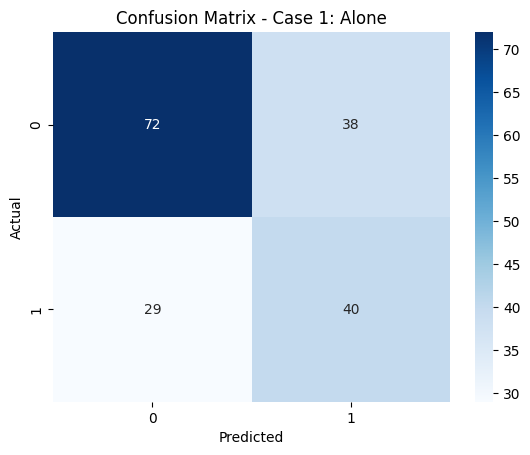

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 1: Alone")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

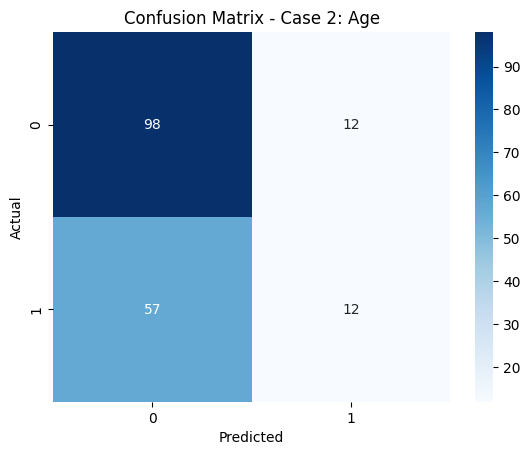

In [76]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 2: Age")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

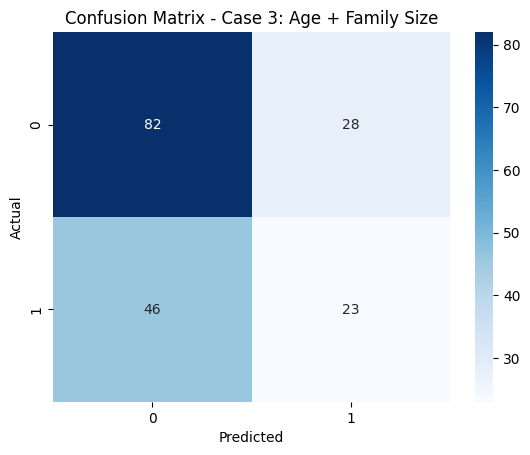

In [77]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 3: Age + Family Size")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 4.5 Report Decision Tree Plot

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

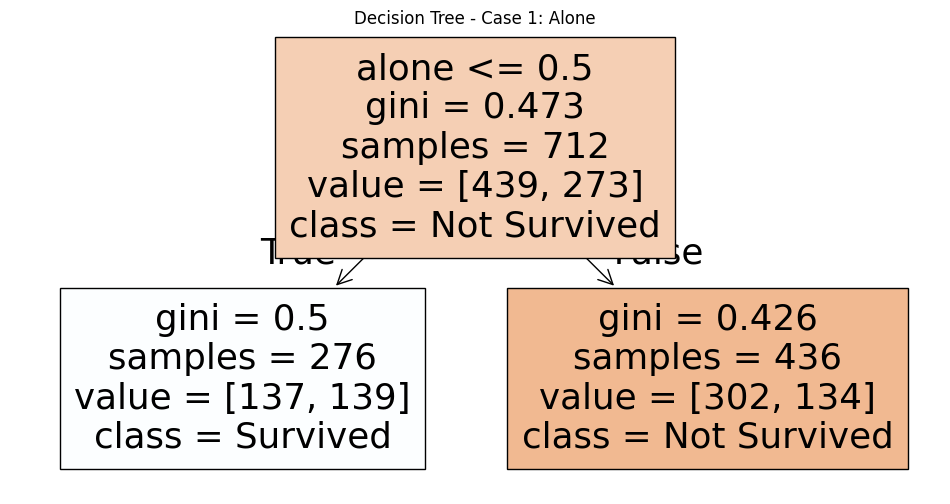

In [79]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=["Not Survived", "Survived"],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")

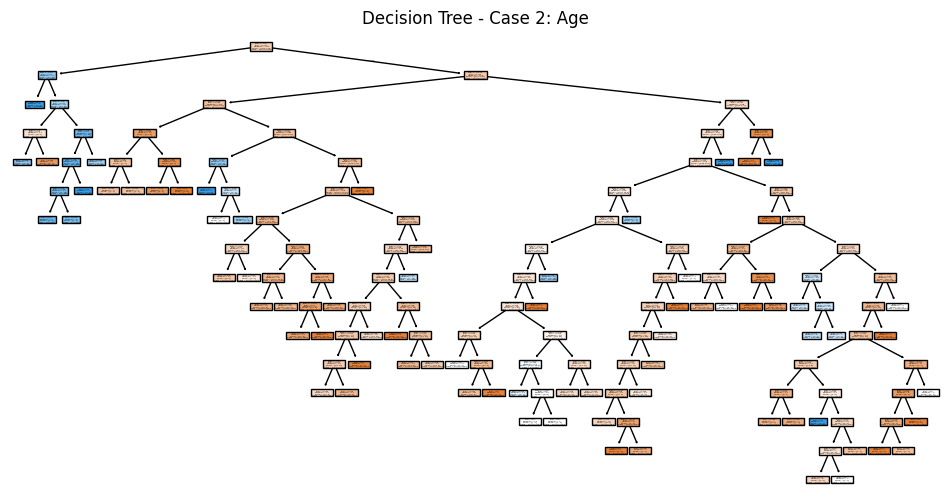

In [80]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=["Not Survived", "Survived"],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

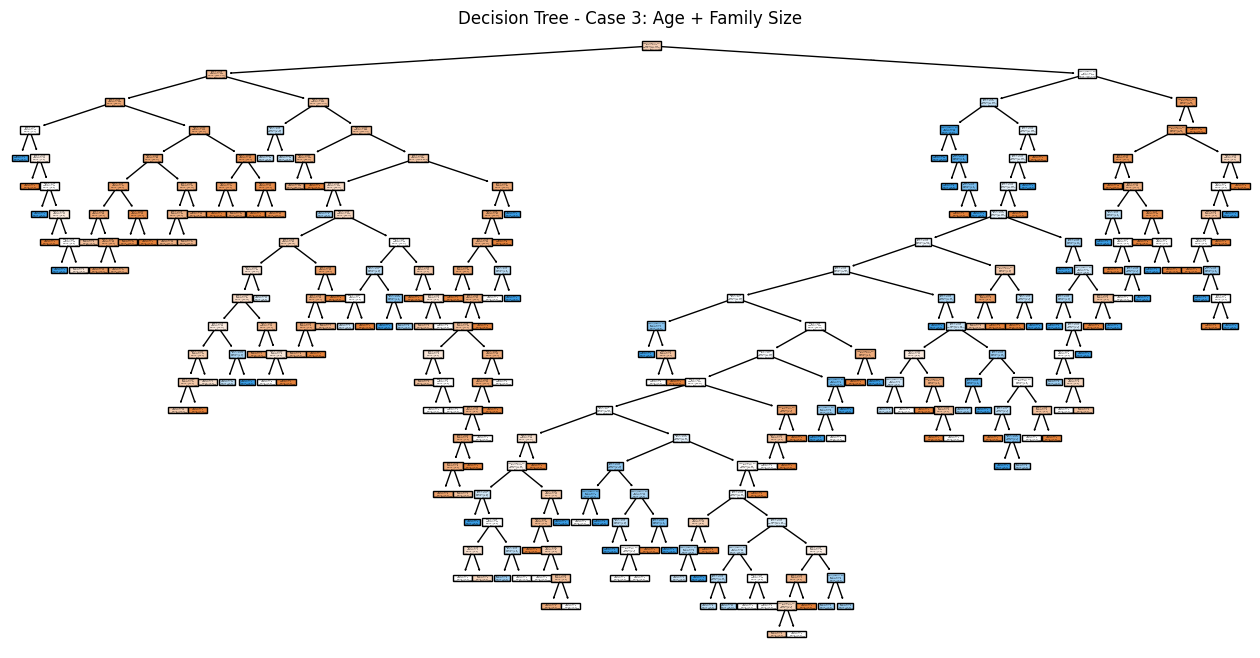

In [81]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=["Not Survived", "Survived"],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

## Reflection 4:
How well did the different cases perform? Each case performed well. Case 2 and 3 gave more complex decision trees, which makes sense as there is more data to factor in. Age created many splits. Combining age and family size showed a change in the pattern.
Are there any surprising results? Not too surprising. We see that being young and in a small family increased the chance of survival. 
Which inputs worked better? I think Case 3 inputs combining age and family size gave us a stronger idea of what factors might have affected survivability.

### Section 5. Compare Alternative Models (SVC, NN)
This feature is going to help us find the best possible boundary (hyperplane) that separates two or more classes of data points.
2D- boundary is a line
3D- boundary is a plane
higher dimensions- a hyperplane
The best boundary is the one that maximizes the distance between the boundary and the nearest data points from each class (support vectors).

SVC Kernel: Common Types

RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
Linear – Best for linearly separable data (straight line separation)
Polynomial – Useful when the data follows a curved pattern
Sigmoid – Similar to a neural network activation function; less common

Commenting the options in and out in the code can be helpful. The analyst decides which to use based on their understanding of the results. 

In [82]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel="rbf")
# svc_model.fit(X_train, y_train)

# Linear Kernel
# svc_model = SVC(kernel="linear")
# svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel="poly", degree=3)
# svc_model.fit(X_train, y_train)

# Sigmoid Kernel
# svc_model = SVC(kernel="sigmoid")
# svc_model.fit(X_train, y_train)

## SVC Kernel: How to Choose

Start with linear if you suspect the data is linearly separable.
Use RBF if the data is complex or you aren’t sure.
Try polynomial if the data seems to follow a curved boundary.
Use sigmoid for experiments (rarely the best choice).
SVC Kernel: Common Issues and Techniques

If the model takes too long to train, reduce the degree for polynomial kernels.
If support_vectors_ gives an error, the data may not be separable with the current kernel. Try switching to RBF or adjusting the C (regularization) value.
If the model misclassifies many points, then increase/decrease gamma or C.

## 5.1 Train and Evaluate Model (SVC)

In [83]:
from sklearn.svm import SVC

In [84]:
# CASE 1: SVC using 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - Alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - Alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [85]:
# CASE 2: SVC using 'age'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 2 - Age):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 2 - Age):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [86]:
# CASE 3: SVC using 'age + family size'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 3 - Age + Family Size):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 3 - Age + Family Size):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



## 5.2 Visualize Support Vectors (1D Case 1 and 2D Case 3)
Use scatter plots to visualize support vectors. 
Step 1) Split the data into two groups:

Survived – Passengers who survived the Titanic sinking (value = 1).
Not Survived – Passengers who did not survive (value = 0).
Step 2) Plot each category using different shapes and colors:

Yellow squares ('s') for survived passengers
Cyan triangles ('^') for non-survived passengers
Step 3) Overlay the support vectors — the critical data points used to define the decision boundary — with black plus signs.

Black pluses ('+') will represent the support vectors.
Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

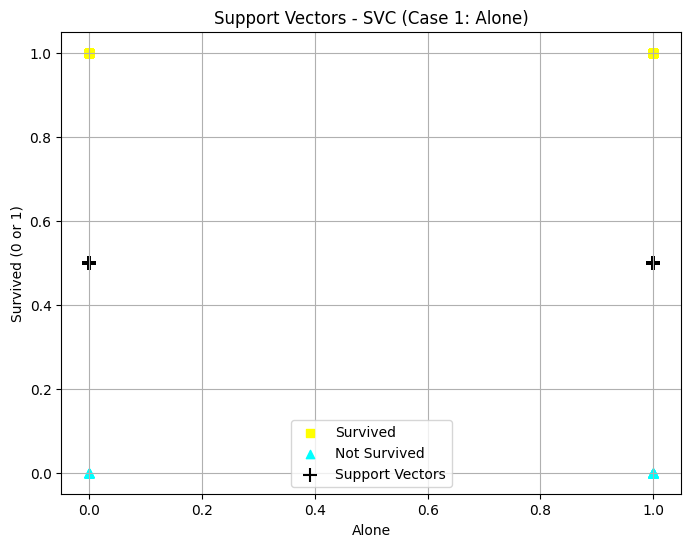

In [87]:
import matplotlib.pyplot as plt # all imports at the top

# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, "alone"]
not_survived_alone = X1_test.loc[y1_test == 0, "alone"]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c="yellow", marker="s", label="Survived")
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c="cyan", marker="^", label="Not Survived")

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, "support_vectors_"):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c="black", marker="+", s=100, label="Support Vectors")

# Add labels and legend
plt.xlabel("Alone")
plt.ylabel("Survived (0 or 1)")
plt.title("Support Vectors - SVC (Case 1: Alone)")
plt.legend()
plt.grid(True)
plt.show()

# Train Case 2 Model 
Using only age feature

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1️⃣ Prepare your data
# Example: assume your Titanic DataFrame is named df
X2 = data_frame[["age"]]        # Features for Case 2
y2 = data_frame["survived"]     # Target variable

# Split into train/test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 2️⃣ Train your SVM (Case 2)
svc_model2 = SVC(kernel="rbf")  # You can change kernel="linear", etc.
svc_model2.fit(X2_train, y2_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


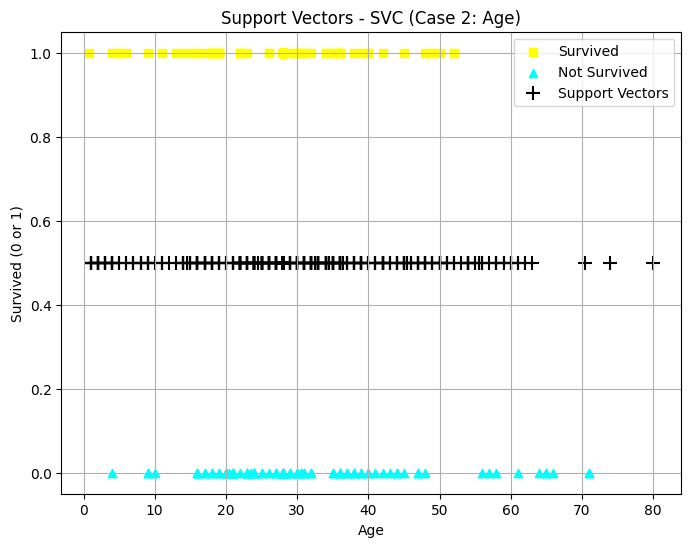

In [89]:
import matplotlib.pyplot as plt

# Create groups based on survival
survived_age = X2_test.loc[y2_test == 1, "age"]
not_survived_age = X2_test.loc[y2_test == 0, "age"]

plt.figure(figsize=(8, 6))
plt.scatter(survived_age, y2_test.loc[y2_test == 1], c="yellow", marker="s", label="Survived")
plt.scatter(not_survived_age, y2_test.loc[y2_test == 0], c="cyan", marker="^", label="Not Survived")

# Overlay support vectors
if hasattr(svc_model2, "support_vectors_"):
    support_x = svc_model2.support_vectors_[:, 0]
    plt.scatter(support_x, [0.5] * len(support_x), c="black", marker="+", s=100, label="Support Vectors")

plt.xlabel("Age")
plt.ylabel("Survived (0 or 1)")
plt.title("Support Vectors - SVC (Case 2: Age)")
plt.legend()
plt.grid(True)
plt.show()

# Train Case 3 Model 
Using age and family size features

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1️⃣ Prepare your data
# Example: assume your Titanic DataFrame is named df
X3 = data_frame[["age", "family_size"]]        # Features for Case 3
y3 = data_frame["survived"]     # Target variable

# Split into train/test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# 2️⃣ Train your SVM (Case 3)
svc_model3 = SVC(kernel="rbf", C=1, gamma="scale")  # you can adjust kernel if you like
svc_model3.fit(X3_train, y3_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


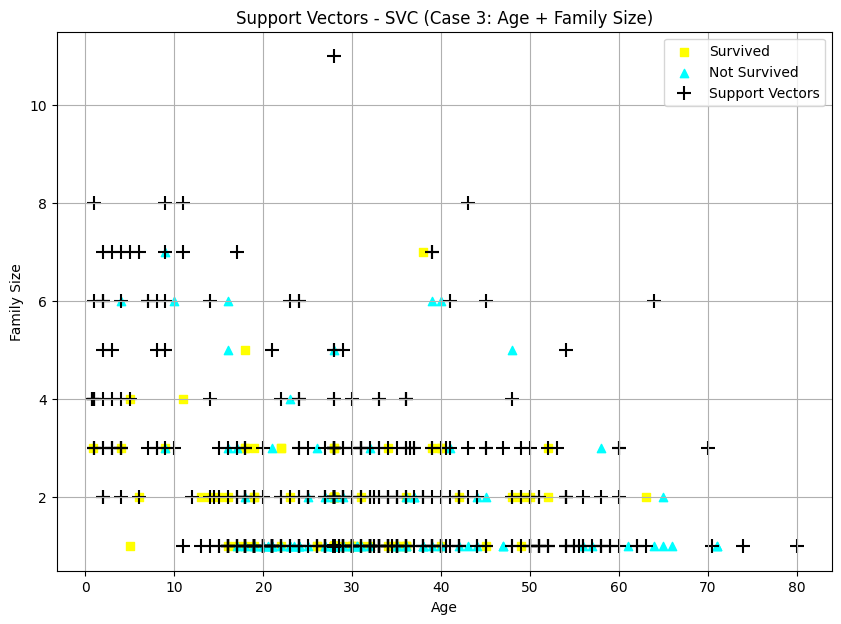

In [91]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived["age"], survived["family_size"],
            c="yellow", marker="s", label="Survived")

# Plot not survived (cyan triangles)
plt.scatter(not_survived["age"], not_survived["family_size"],
            c="cyan", marker="^", label="Not Survived")

# Overlay support vectors
if hasattr(svc_model3, "support_vectors_"):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c="black", marker="+", s=100, label="Support Vectors")

# Add labels, title, and legend
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Support Vectors - SVC (Case 3: Age + Family Size)")
plt.legend()
plt.grid(True)
plt.show()

## 5.3 Train and Evaluate Model (Neural Network on Case 3)

In [92]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

In [93]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [94]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       105
           1       0.70      0.35      0.47        74

    accuracy                           0.67       179
   macro avg       0.68      0.62      0.61       179
weighted avg       0.68      0.67      0.64       179



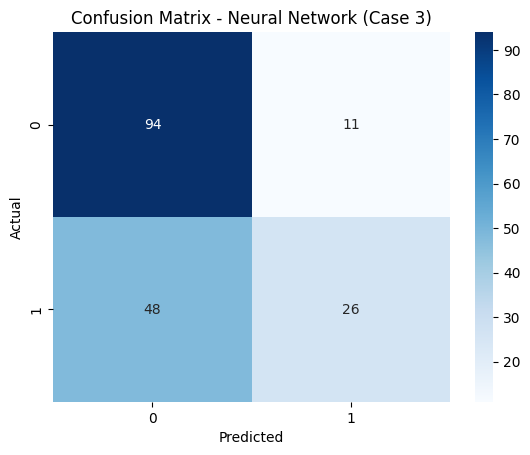

In [95]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Neural Network (Case 3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 5.4 Visualize (Neural Network on Case 3)
Visualize the learned decision boundary of the neural network; how it separates the two target classes into survived and not-survived. Use age and family size to create a 2D plot showing how the model predicts across different combinations of these features.

c:\Repos\applied-ml-fuemmeler\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


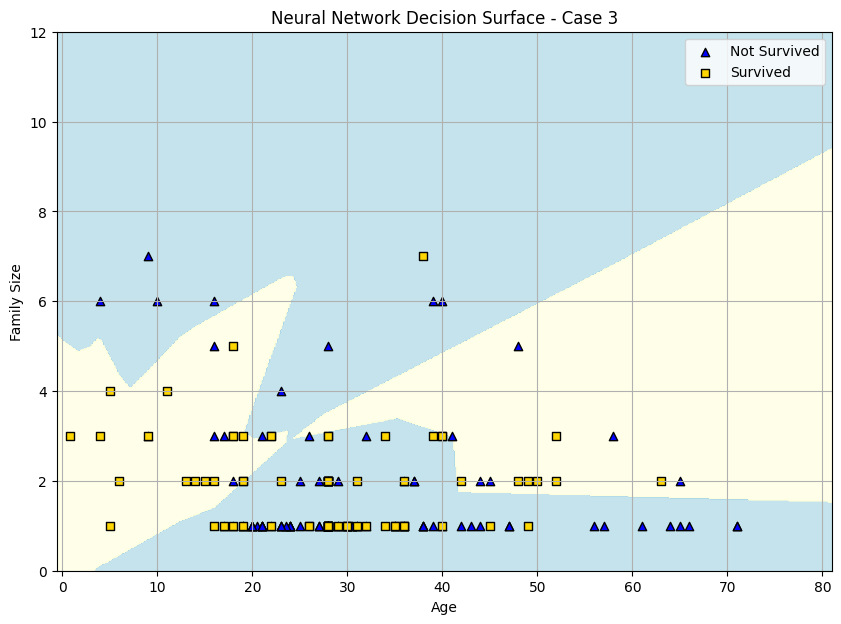

In [96]:
# imports at the top (only once each, organized)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Get the range of our two features - use padding to enhance appearance

padding = 1
x_min, x_max = X3["age"].min() - padding, X3["age"].max() + padding
y_min, y_max = X3["family_size"].min() - padding, X3["family_size"].max() + padding

# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))

# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(["lightblue", "lightyellow"])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

# Overlay the actual test data points for visual comparison

# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X3_test["age"][y3_test == 0],
            X3_test["family_size"][y3_test == 0],
            c="blue", marker="^", edgecolor="k", label="Not Survived")

# Plot passengers who DID survive (1) as gold squares
plt.scatter(X3_test["age"][y3_test == 1],
            X3_test["family_size"][y3_test == 1],
            c="gold", marker="s", edgecolor="k", label="Survived")

# Add axis labels, title, legend, and grid
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Neural Network Decision Surface - Case 3")
plt.legend()
plt.grid(True)
plt.show()

## Reflection 5:
How well did each of these new models/cases perform? Each model for the three cases performed well.
Are there any surprising results or insights? Not that we haven't already found.
Why might one model outperform the others? A model may perform better if the pattern in the data matches the model's assumptions. Otherwise we would see results that are too simple or too complex.

### Section 6. Final Thoughts & Insights
This was a very fun and interesting module. While it seems like a difficult concept, when we break it down, Machine Learning is definitely approachable. Helping computers recognize patterns and make decisions based on data is something we do naturally every day as humans. Machine Learning is not just about writing the code. We have to think critically about why certain models work better or how different data transformations reveal different information. 

## Markdown code for generic classification project

| Model Type           | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------          |------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree 	   | Case 1 | alone | 63% | 64% | 63% | 63% | 
|                      | Case 2 | age | 61% | 58% | 61% | 55% |
|                      | Case 3 | age + family_size | 60% | 57% | 59% | 57% | 
| Neural Network (MLP) | Case 1 | alone | xx.xx% | xx.xx% | xx.xx% | xx.xx% |
|                      | Case 2 | age | xx.xx% | xx.xx% | xx.xx% | xx.xx% |
|                      | Case 3 | age + family_size | 67% | 68% | 67% | 64% |
